# Summary Assignment 1
<blockquote>This assignment will be autograded. To avoid autograder errors, please do not add or delete any cells. Also, run all cells even if they are hidden and not requiring any input from you.</blockquote>

In [1]:
# Load Necesary Libraries for Autograding
library(testthat)

# Problem 1

Let the joint PDF $f(X,Y)$ be represented by the following table of values:


|  | y=-1| y=0 | y=1 | y=2 |
| :--- | :----: | :---: | :---: | ---: |
| $x=2$ | 0.1 | 0 | 0.15 | 0 |
| $x=3$ | 0.1 | 0.1 | 0.05 | 0.05 |
| $x=4$ | 0 | 0.05 | 0.15 | 0.25 |

 **Part A)** Find $E[X]$ and $E[Y]$. Save your answers as `p1.a.ex` and `p1.a.ey`.

In [3]:
p1.a.ex = NA
p1.a.ey = NA

#joint PDF table
joint_pdf=matrix(c(0.1, 0, 0.15, 0,
                  0.1, 0.1, 0.05, 0.05,
                  0, 0.05, 0.15, 0.25),
                nrow=3, byrow=TRUE)
rownames(joint_pdf) = c(2,3,4)
colnames(joint_pdf) = c(-1, 0, 1, 2)

x_vals=as.numeric(rownames(joint_pdf))
y_vals=as.numeric(colnames(joint_pdf))

p_x=rowSums(joint_pdf)
p_y=colSums(joint_pdf)

p1.a.ex=sum(x_vals*p_x)
p1.a.ey=sum(y_vals*p_y)

p1.a.ex
p1.a.ey

[1] 3.2

[1] 0.75

In [ ]:
# Hidden Test Cell
# NOTE: This cell contains hidden tests. You will not see if you passed these tests until you submit your assignment.
# Any cell labeled "Hidden Test Cell" MAY have hidden tests.

**Part B)** Find $E[XY]$. Save your answer as `p1.b.exy`.

In [4]:
p1.b.exy = NA

xy_vals=outer(x_vals, y_vals, '*')
p1.b.exy=sum(xy_vals*joint_pdf)
p1.b.exy

[1] 2.85

In [ ]:
# Hidden Test Cell

**Part C)** Are $X$ and $Y$ independent? Answer the boolean value `TRUE` if they are independent and `FALSE` if they are not independent. Save your answer as `p1.c`.

In [5]:
p1.c = NA

p1.c=TRUE
for(i in 1:3) {
    for(j in 1:4){
        if(abs(joint_pdf[i, j] - p_x[i]*p_y[j]) > 1e-6){
            p1.c=FALSE
        }
    }
}
p1.c

[1] FALSE

In [10]:
# Hidden Test Cell
if(!test_that("Check that answer is correct type", expect_is(p1.c, "logical"))){
    print("Make sure your answer is a boolean!")
}


**Part D)** Define $U=X+Y$. What is $P(U \ge 4)$? Save your answer as `p1.d`.

In [6]:
p1.d = NA

U_vals=outer(x_vals, y_vals, '+')
p1.d=sum(joint_pdf[U_vals >= 4])
p1.d

[1] 0.55

In [ ]:
# Hidden Test Cell

# Problem 2

You work at the front desk of a library, and have to manage the printer. Sadly, the printer is old, and regularly jams. You know that your boss will only replace the printer if there is hard evidence, so you decide to record the number of times the printer was able to print successfully **before** it jammed. These values are recorded in `prints` below. Assume that these values are independent and identically distributed.

In [7]:
prints = c(12, 9, 3, 17, 5, 5, 3, 7, 0, 5, 17, 6, 9, 1, 13)

**Part A)** Let $X$ be a random variable for the number of times the printer was able to print before it jammed. Then $X$ follows a Geometric distribution with some unknown probability $p$, where $X_i \in {0, 1, 2, \dots}$. We want to estimate $p$, that is the probability that the printer fails. Using the method of moments, what is the estimate $\hat{p}$?

1. $\dfrac{1}{\bar{X}}$
2. $\dfrac{1}{\bar{X}+1}$
3. $\dfrac{\bar{X}}{\bar{X}+1}$
4. $\dfrac{\bar{X}}{1-\bar{X}}$
5. None of the above.

Save the NUMBER corresponding to the correct answer into the variable `p2.a`.

In [15]:
p2.a = NA

X_bar=mean(prints)
p2.a=2 #this is like p=1/(X+1)


In [16]:
# Hidden Test Cell
if(!test_that("Make sure your answer is the NUMBER of the correct answer", expect_is(p2.a, "numeric"))){
    print("Make sure your answer is the number corresponding to your answer.")
}


**Part B)** Given your solution to **Part A**, calculate the estimated probability for the recorded data. Save this value into `p2.b`. (Include at least 2 decimal places.)

In [17]:
p2.b = NA

p2.b=1/(X_bar+1)
p2.b


[1] 0.1181102

In [18]:
# Hidden Test Cell

**Part C)** Let's try to visualize how well our estimator actually fits the data. 

To create a histogram of the "prints" data, one only needs to type <code>hist(prints)</code>. In order to store the results in a way the autograder can interpret, we need to store this in a variable like this: <code>my_hist_var=hist(prints)</code>

Recall that the y-axis of a histogram can be scaled in many different ways.
In order to make it so that the total area of each bar is the proportion of observations observed in the corresponding bin, we need to add "prob=T" (probability equals true) to the histogram command. This is called a "density histogram".

Finally, to control the way the bins break on the x-axis, we need to give a sequence of break values. As an example unrelated to this exercise, we might type <code>my_hist_var = hist(mydata,prob=T,breaks=seq(1,8,1))</code> to put breaks at 1,2, ..., 8.

For this exercise,  create a density histogram of the `prints` values and store it in variable `p2.c.hist`. Center the bars on the integers 0 through 17 by making breaks at -0.5, 0.5, 1.5, ..., 17.5. Add the curve of a geometric distribution, with the probability of what you estimated in **Part B**, ontop of your histogram. Think about how well this curve approximates the distribution.

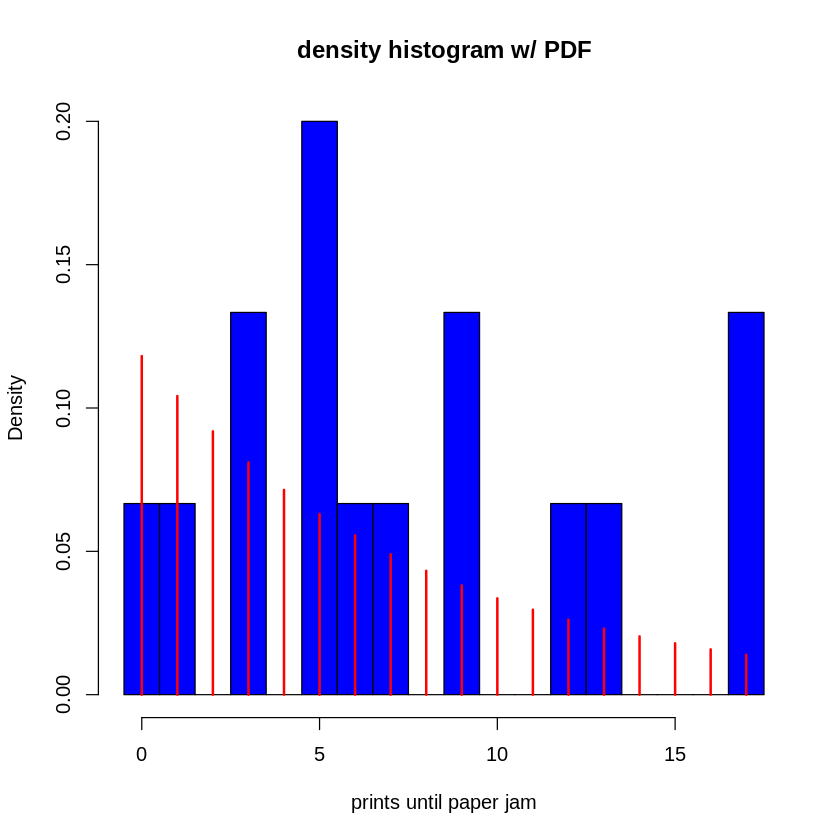

In [19]:
p2.c.hist = NA

p2.c.hist=hist(prints, prob=TRUE, breaks=seq(-0.5, 17.5, 1),
              main='density histogram w/ PDF',
              xlab='prints until paper jam', col='blue')
x_vals=0:17
geom_probs=dgeom(x_vals, prob=p2.b)
lines(x_vals, geom_probs, type='h', col='red', lwd=2)


In [20]:
# Hidden Test Cell

**Part D)** what is the *true* underlying probability of this distribution? Save your answer as `p2.d` and round your answer to two decimal places. If it's not possible to answer this question, save your answer as the string `"not possible"`.

In [29]:
p2.d = NA

p2.d = 'not possible'

In [22]:
# Hidden Test Cell